In [91]:
import numpy as np
import pandas as pd

tweets = pd.read_csv("../input/tweets/tweets.csv", header = None)
tweets.columns = ['Sentiment', 'Tweet']

import collections
collections.Counter(tweets['Sentiment'])

tweets.head()

,Sentiment,Tweet
0,Negative,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...
1,Negative,يا ثقل دمه الاصلع\n
2,Negative,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n
3,Negative,كله على راس المواطن ما يثير السخرية رفع اسعار ...
4,Negative,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...


In [92]:
import re
import string

def removeMentionsUrls(text):
    tweetOut = re.sub(r'@[A-Za-z0-9]+','',text)
    re.sub('https?://[A-Za-z0-9./]+','',tweetOut)
    return tweetOut

def removeNonAlphaNumeric(text):
    textOut = "".join([char for char in text if char not in string.punctuation])
    return textOut

tweets["No Mention No URL"] = tweets['Tweet'].apply(lambda x: removeMentionsUrls(x))

tweets["No Punctuation"] = tweets["No Mention No URL"].apply(lambda x: removeNonAlphaNumeric(x))

tweets.head()

,Sentiment,Tweet,No Mention No URL,No Punctuation
0,Negative,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...
1,Negative,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n
2,Negative,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع ﻿ اول واحد جايته زبيريه \n
3,Negative,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...
4,Negative,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...


In [96]:
def tokenization(text):
    tokens = re.split('\W+', text)
    return tokens

tweets["Tokenized"] = tweets["No Punctuation"].apply(lambda x: tokenization(x.lower()))

tweets.head()

,Sentiment,Tweet,No Mention No URL,No Punctuation,Tokenized,Stemmed
0,Negative,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,"[, أنا, متأكده, أنو, هذولي, مدفوعلهم, علشان, ي...","[, أنا, متأكده, أنو, هذولي, مدفوعلهم, علشان, ي..."
1,Negative,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n,"[, يا, ثقل, دمه, الاصلع, ]","[, يا, ثقل, دمه, الاصلع, ]"
2,Negative,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع ﻿ اول واحد جايته زبيريه \n,"[, سوبر, طقاع, اول, واحد, جايته, زبيريه, ]","[, سوبر, طقاع, اول, واحد, جايته, زبيريه, ]"
3,Negative,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...,"[كله, على, راس, المواطن, ما, يثير, السخرية, رف...","[كله, على, راس, المواطن, ما, يثير, السخرية, رف..."
4,Negative,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,"[, الا, يكفي, ان, نسبة, مرضى, السرطان, في, الا...","[, الا, يكفي, ان, نسبة, مرضى, السرطان, في, الا..."


In [95]:
import nltk
ps = nltk.PorterStemmer()

def stemming(text):
    outText = [ps.stem(word) for word in text]
    return outText

tweets["Stemmed"] = tweets["Tokenized"].apply(lambda x: stemming(x))

tweets.head()

,Sentiment,Tweet,No Mention No URL,No Punctuation,Tokenized,Stemmed
0,Negative,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,أنا متأكده أنو هذولي مدفوعلهم علشان يجون يغنو...,"[, أنا, متأكده, أنو, هذولي, مدفوعلهم, علشان, ي...","[, أنا, متأكده, أنو, هذولي, مدفوعلهم, علشان, ي..."
1,Negative,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n,يا ثقل دمه الاصلع\n,"[, يا, ثقل, دمه, الاصلع, ]","[, يا, ثقل, دمه, الاصلع, ]"
2,Negative,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع .........﻿ اول واحد جايته زبيريه \n,﻿سوبر طقاع ﻿ اول واحد جايته زبيريه \n,"[, سوبر, طقاع, اول, واحد, جايته, زبيريه, ]","[, سوبر, طقاع, اول, واحد, جايته, زبيريه, ]"
3,Negative,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...,كله على راس المواطن ما يثير السخرية رفع اسعار ...,"[كله, على, راس, المواطن, ما, يثير, السخرية, رف...","[كله, على, راس, المواطن, ما, يثير, السخرية, رف..."
4,Negative,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,﻿الا يكفي ان نسبة مرضى السرطان في الاردن اعلى ...,"[, الا, يكفي, ان, نسبة, مرضى, السرطان, في, الا...","[, الا, يكفي, ان, نسبة, مرضى, السرطان, في, الا..."


In [109]:
import itertools
ListOfUniqueWords = set(list(itertools.chain.from_iterable(tweets["Stemmed"])))

def join_tokens(tokens):
    document = " ".join([word for word in tokens if not word.isdigit()])
    
    return document

tweets["Dataset Documents"] = tweets["Stemmed"].apply(lambda x: join_tokens(x))

#print("A Sample of Unique Words of the Data\n")
#print(list(ListOfUniqueWords)[:20])
print(len(ListOfUniqueWords))

7071


In [112]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ListOfUniqueWords, max_features=5000)

countvector = cv.fit_transform(tweets["Dataset Documents"])

countvectorDF = pd.DataFrame(countvector.toarray())
countvectorDF.columns = cv.get_feature_names()

countvectorDF.head(10)

,14ساعة,aes92,principl,أثر,أثناء,أجل,أجمعين,أجمل,أجنبي,أحد,...,ﻧﻔﺴـﻪ,ﻫﺪﻣﺖ,ﻭﺍﻟﺸﻴﻌﻪ,ﻭﺷﺮﺩﺕ,ﻭﻃﻨﻲ,ﻳﺎ,ﻳﺎﺑﻦ,ﻳﺎﺣﻤﺎﺭ,ﻳﺸﻴﻞ,ﻳﺼﻠـﻲ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Split Data
X = countvectorDF
y = tweets["Sentiment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Classifier Report
               precision    recall  f1-score   support

    Negative       0.83      0.89      0.86       309
    Positive       0.87      0.81      0.84       289

    accuracy                           0.85       598
   macro avg       0.85      0.85      0.85       598
weighted avg       0.85      0.85      0.85       598

Accuracy: 0.8478260869565217


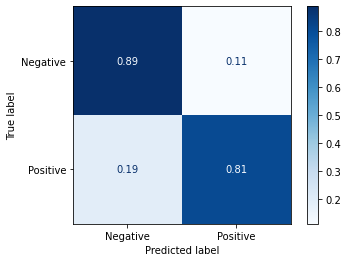

In [131]:
# Classification with Logistic Regression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

loreg = logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Classifier Report\n",classification_report(y_test, y_pred))
accCLF = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", accCLF)

disp = metrics.plot_confusion_matrix(loreg, X_test, y_test, display_labels=set(y), normalize='true', cmap=plt.cm.Blues)
print(disp)

Decision Tree Report
               precision    recall  f1-score   support

    Negative       0.77      0.80      0.78       309
    Positive       0.78      0.75      0.76       289

    accuracy                           0.77       598
   macro avg       0.77      0.77      0.77       598
weighted avg       0.77      0.77      0.77       598

Accuracy :  0.774247491638796


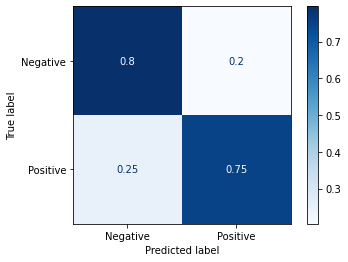

In [134]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predDTC = dtc.predict(X_test)

print("Decision Tree Report\n",classification_report(y_test,y_predDTC))
accDTC = metrics.accuracy_score(y_test,y_predDTC)
print("Accuracy : ",accDTC)

disp = metrics.plot_confusion_matrix(dtc, X_test, y_test, display_labels=set(y), normalize='true', cmap=plt.cm.Blues)
print(disp)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_predNB = bnb.predict(X_test)

print("Bayes Naïve Report\n",classification_report(y_test,y_predNB))
accNB = metrics.accuracy_score(y_test,y_predNB)
print("Accuracy : ",accNB)

disp = metrics.plot_confusion_matrix(bnb, X_test, y_test, display_labels=set(y), normalize='true', cmap=plt.cm.Blues)
print(disp)